# Walmart Capstone project

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## 1. Load data

In [2]:
# Loading datasets
df_features = pd.read_csv('features.csv')
df_train = pd.read_csv('train.csv')
df_stores = pd.read_csv('stores.csv')
df_test = pd.read_csv('test.csv')

## 2. Data Exploration

In [3]:
# Exploring the features data set
print(df_features.head(4).append(df_features.tail(4)), '\n')
print('The dimensions of features dataset are:\n', df_features.shape, '\n')
print('Summary statistics:\n', df_features.describe(), '\n')

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        Na

In [4]:
# Exploring stores data
print(df_stores.head(4).append(df_stores.tail(4)), '\n')
print('Dimensions of stores dataset:\n', df_stores.shape)
print('Summary statistics for stores dataset:\n', df_stores.describe())

    Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221 

Dimensions of stores dataset:
 (45, 3)
Summary statistics for stores dataset:
            Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


In [5]:
# Exploring training data
print(df_train.head(4).append(df_train.tail(4)), '\n')
print('Dimensions of stores dataset:\n', df_train.shape)
print('Summary statistics for stores dataset:\n', df_train.describe())

        Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False 

Dimensions of stores dataset:
 (421570, 5)
Summary statistics for stores dataset:
                Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.8

In [6]:
# Exploring test data set
print(df_test.head(4).append(df_test.tail(4)), '\n')
print('Dimensions of stores dataset:\n', df_test.shape)
print('Summary statistics for stores dataset:\n', df_test.describe())

        Store  Dept        Date  IsHoliday
0           1     1  2012-11-02      False
1           1     1  2012-11-09      False
2           1     1  2012-11-16      False
3           1     1  2012-11-23       True
115060     45    98  2013-07-05      False
115061     45    98  2013-07-12      False
115062     45    98  2013-07-19      False
115063     45    98  2013-07-26      False 

Dimensions of stores dataset:
 (115064, 4)
Summary statistics for stores dataset:
                Store           Dept
count  115064.000000  115064.000000
mean       22.238207      44.339524
std        12.809930      30.656410
min         1.000000       1.000000
25%        11.000000      18.000000
50%        22.000000      37.000000
75%        33.000000      74.000000
max        45.000000      99.000000


In [7]:
# Missing values in features
features_missing_values = df_features.isnull().sum()*100/len(df_features)
features_data_types = df_features.dtypes

features_properties = pd.DataFrame({'Percent missing': features_missing_values.round(2),
                                  'Data Types': features_data_types})

features_properties
# df_features.columns

,Percent missing,Data Types
Store,0.00,int64
Date,0.00,object
Temperature,0.00,float64
Fuel_Price,0.00,float64
MarkDown1,50.77,float64
MarkDown2,64.33,float64
MarkDown3,55.89,float64
MarkDown4,57.70,float64
MarkDown5,50.55,float64
CPI,7.14,float64


In [8]:
# Missing values in stores
stores_missing_values = df_stores.isnull().sum()*100/len(df_stores)
stores_data_types = df_stores.dtypes

stores_properties = pd.DataFrame({'Percent missing': stores_missing_values.round(2),
                                  'Data Types': stores_data_types})

stores_properties

,Percent missing,Data Types
Store,0.0,int64
Type,0.0,object
Size,0.0,int64


In [9]:
# Missing values in training
train_missing_values = df_train.isnull().sum()*100/len(df_train)
train_data_types = df_train.dtypes

train_properties = pd.DataFrame({'Percent missing': train_missing_values.round(2),
                                  'Data Types': train_data_types})

train_properties

,Percent missing,Data Types
Store,0.0,int64
Dept,0.0,int64
Date,0.0,object
Weekly_Sales,0.0,float64
IsHoliday,0.0,bool


In [10]:
# Missing values in test
test_missing_values = df_test.isnull().sum()*100/len(df_train)
test_data_types = df_test.dtypes

test_properties = pd.DataFrame({'Percent missing': test_missing_values.round(2),
                                  'Data Types': test_data_types})

test_properties

,Percent missing,Data Types
Store,0.0,int64
Dept,0.0,int64
Date,0.0,object
IsHoliday,0.0,bool


In [11]:
# Make date types constant
df_features['Date'] = pd.to_datetime(df_features['Date'], format = '%Y-%m-%d')
df_train['Date'] = pd.to_datetime(df_train['Date'], format = '%Y-%m-%d')
df_test['Date'] = pd.to_datetime(df_test['Date'], format = '%Y-%m-%d')

## 3. Data Wrangling

In [12]:
# Combine training and test data with stores data
combined_train = pd.merge(df_train, df_stores, how = 'left', on = 'Store')
combined_test = pd.merge(df_test, df_stores, how = 'left', on = 'Store')

print(combined_train.head(), '\n', combined_train.shape, '\n')
print(combined_test.head(), '\n', combined_test.shape, '\n')

   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size
0      1     1 2010-02-05      24924.50      False    A  151315
1      1     1 2010-02-12      46039.49       True    A  151315
2      1     1 2010-02-19      41595.55      False    A  151315
3      1     1 2010-02-26      19403.54      False    A  151315
4      1     1 2010-03-05      21827.90      False    A  151315 
 (421570, 7) 

   Store  Dept       Date  IsHoliday Type    Size
0      1     1 2012-11-02      False    A  151315
1      1     1 2012-11-09      False    A  151315
2      1     1 2012-11-16      False    A  151315
3      1     1 2012-11-23       True    A  151315
4      1     1 2012-11-30      False    A  151315 
 (115064, 6) 



In [13]:
# Combine above dataset with features data
combined_train = pd.merge(combined_train, df_features, how = 'left', on = ['Store', 'Date'])
combined_test = pd.merge(combined_test, df_features, how = 'left', on = ['Store', 'Date'])

In [14]:
combined_train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [15]:
# Drop extra isHoliday_y column
combined_train = combined_train.drop(['IsHoliday_y'], axis = 1)
combined_test = combined_test.drop(['IsHoliday_y'], axis = 1)

In [16]:
combined_test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday_x', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [17]:
combined_train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [18]:
# Creating new features from date
combined_train['Day'] = [t.dayofweek for t in pd.DatetimeIndex(combined_train.Date)] 
combined_train['Month'] = [t.month for t in pd.DatetimeIndex(combined_train.Date)] 
combined_train['Year'] = [t.year for t in pd.DatetimeIndex(combined_train.Date)] 
combined_train.head(10)
# print(combined_train.Type.unique())

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,2,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,4,2,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,4,2,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,4,2,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,4,3,2010
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,4,3,2010
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,4,3,2010
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,4,3,2010
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,4,4,2010
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,4,4,2010


In [19]:
# Converting Type variable to dummy variables
type_dummy = pd.get_dummies(combined_train['Type'])
print(type_dummy.head())

   A  B  C
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  1  0  0


In [20]:
combined_test.describe()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000
mean,22.238207,44.339524,136497.688921,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733
std,12.809930,30.656410,61106.926438,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427
min,1.000000,1.000000,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000
25%,11.000000,18.000000,93638.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000
50%,22.000000,37.000000,140167.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000
75%,33.000000,74.000000,202505.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000
max,45.000000,99.000000,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


In [21]:
print(combined_train.isnull().sum(), '\n')
print(combined_test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Day                  0
Month                0
Year                 0
dtype: int64 

Store               0
Dept                0
Date                0
IsHoliday_x         0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [22]:
# Substitute null values with 0
processed_train = combined_train.fillna(0)
processed_test = combined_test.fillna(0)

In [23]:
# Checking for null values
print(processed_train.info(), '\n')
print(processed_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday_x     421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Day             421570 non-null int64
Month           421570 non-null int64
Year            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(6), object(1)
memory usage: 61.5+ MB
None 

<class 'pandas.core.frame.DataFrame'>
I

In [24]:
processed_train.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,4.0,6.449510,2010.968591
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.0,3.243217,0.796876
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,4.0,4.000000,2010.000000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,4.0,6.000000,2011.000000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,4.0,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,4.0,12.000000,2012.000000


In [25]:
processed_test.describe()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,136497.688921,53.941804,3.581546,7679.259430,2805.049619,2197.811964,2980.298267,3922.681189,118.270541,4.590657
std,12.809930,30.656410,61106.926438,18.724153,0.239442,10695.406505,7392.556347,13183.888087,7212.030921,19445.150745,89.878361,3.483338
min,1.000000,1.000000,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.000000,-185.170000,0.000000,0.000000
25%,11.000000,18.000000,93638.000000,39.820000,3.431000,1963.550000,0.000000,7.770000,70.370000,1309.300000,0.000000,0.000000
50%,22.000000,37.000000,140167.000000,54.470000,3.606000,4828.720000,316.880000,60.000000,600.580000,2390.430000,138.402033,5.771000
75%,33.000000,74.000000,202505.000000,67.350000,3.766000,9427.410000,1575.850000,244.200000,2627.850000,4227.270000,201.212230,7.293000
max,45.000000,99.000000,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


## 4. Data Visualization

This section includes some of the questions we asked of the data.

In [26]:
# processed_train.info()
processed_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,4,2,2010
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,4,2,2010
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,4,2,2010
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,4,3,2010


In [27]:
# Co-relation matrix for all variables
corr = processed_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\karti\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Store,Dept,Weekly_Sales,IsHoliday_x,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Month,Year
Store,1,0.024,-0.085,-0.00055,-0.18,-0.05,0.065,-0.06,-0.034,-0.02,-0.043,-0.012,-0.21,0.21,nan,0.001,0.003
Dept,0.024,1,0.15,0.00092,-0.003,0.0044,0.0036,0.0015,0.00059,0.0015,0.0019,0.0027,-0.0075,0.0078,nan,0.0009,0.0037
Weekly_Sales,-0.085,0.15,1,0.013,0.24,-0.0023,-0.00012,0.047,0.021,0.039,0.037,0.05,-0.021,-0.026,nan,0.028,-0.01
IsHoliday_x,-0.00055,0.00092,0.013,1,0.00059,-0.16,-0.078,-0.0035,0.21,0.27,0.012,-0.015,-0.0019,0.01,nan,0.12,-0.057
Size,-0.18,-0.003,0.24,0.00059,1,-0.058,0.0034,0.17,0.078,0.034,0.13,0.15,-0.0033,-0.068,nan,-0.0012,-0.005
Temperature,-0.05,0.0044,-0.0023,-0.16,-0.058,1,0.14,-0.026,-0.18,-0.056,-0.05,-0.015,0.18,0.097,nan,0.24,0.066
Fuel_Price,0.065,0.0036,-0.00012,-0.078,0.0034,0.14,1,0.3,0.029,0.019,0.17,0.22,-0.16,-0.034,nan,-0.041,0.78
MarkDown1,-0.06,0.0015,0.047,-0.0035,0.17,-0.026,0.3,1,0.17,-0.014,0.84,0.42,0.011,-0.11,nan,-0.089,0.5
MarkDown2,-0.034,0.00059,0.021,0.21,0.078,-0.18,0.029,0.17,1,-0.0061,0.11,0.13,-0.0036,-0.041,nan,-0.019,0.13
MarkDown3,-0.02,0.0015,0.039,0.27,0.034,-0.056,0.019,-0.014,-0.0061,1,-0.012,0.042,-0.0058,-0.018,nan,0.12,0.0068


In [28]:
# Avg. sales per department across stores
sns.set() # Format plots per Seaborn standards
processed_train.groupby(['Dept'])['Weekly_Sales'].mean().sort_values(ascending = False).head(10)

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
91    33687.910758
94    33405.883963
Name: Weekly_Sales, dtype: float64

In [29]:
# Best performing store ranked by highest avg. weekly sales
best_store = processed_train.groupby(['Store'])['Weekly_Sales'].mean().sort_values(ascending = False).head(10)
best_perform_store_list = pd.DataFrame(best_store)
print(best_perform_store_list) 

       Weekly_Sales
Store              
20     29508.301592
4      29161.210415
14     28784.851727
13     27355.136891
2      26898.070031
10     26332.303819
27     24826.984536
6      21913.243624
1      21710.543621
39     21000.763562


In [30]:
# Top and bottom 5 performing depts

top_5_depts = pd.DataFrame(processed_train.groupby(['Dept'])['Weekly_Sales'].mean().sort_values(ascending = False).head())
bottom_5_depts = pd.DataFrame(processed_train.groupby(['Dept'])['Weekly_Sales'].mean().sort_values(ascending = False).tail())

# Check mean sales for dept 47

print('Top 5 departments ranked by mean weekly sales:\n', top_5_depts)
print('Bottom 5 departments ranked by mean weekly sales:\n', bottom_5_depts)

Top 5 departments ranked by mean weekly sales:
       Weekly_Sales
Dept              
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
Bottom 5 departments ranked by mean weekly sales:
       Weekly_Sales
Dept              
51       21.931729
39       11.123750
78        7.296638
43        1.193333
47       -7.682554


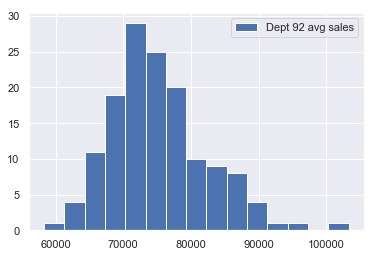

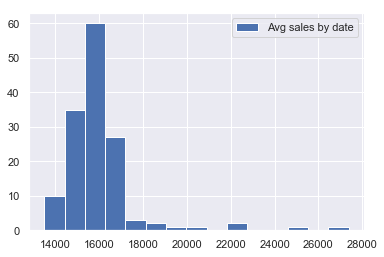

In [31]:
# Histogram for department 92 average sales numbers
sales_dept92 = processed_train[processed_train['Dept'] == 92].drop(columns = ['Type', 'Size'])
mean_sales_dept92 = sales_dept92.groupby('Date')['Weekly_Sales'].mean()
# print(mean_sales_dept92)
plt.hist(mean_sales_dept92, bins = 15, label = 'Dept 92 avg sales')
plt.legend(loc = 'upper right')
plt.show()

# Distribution of avg. sales numbers by date for all stores and departments
mean_sales_all = processed_train.groupby('Date')['Weekly_Sales'].mean()
# print(mean_sales_all)
plt.hist(mean_sales_all, bins = 15, label = 'Avg sales by date')
plt.legend(loc = 'upper right')
plt.show()
# print('The mean of all sales is:\n', mean_sales_all.mean())

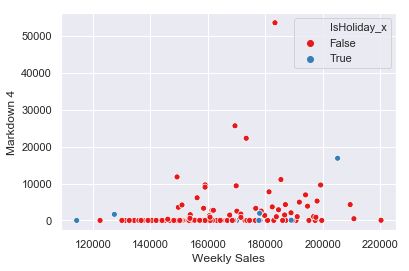

In [32]:
# Scatterplot for best performing dept in best performing store
Store20_Dept92 = processed_train[(processed_train['Store'] == 20) & (processed_train['Dept'] == 92)].drop(columns = ['Store', 'Dept', 'Size', 'Type'])
# print(Store1_Dept1)
sns.scatterplot(y = 'MarkDown4', x = 'Weekly_Sales', data = Store20_Dept92, hue = 'IsHoliday_x', palette = 'Set1')
plt.ylabel('Markdown 4')
plt.xlabel('Weekly Sales')
plt.show()
# As seen from plot below, there is very little correlation between these variables

DateTime dates:
 DatetimeIndex(['2010-02-05', '2010-05-21', '2010-09-03', '2010-12-17',
               '2011-04-01', '2011-07-15', '2011-10-28', '2012-02-10',
               '2012-05-25', '2012-09-07'],
              dtype='datetime64[ns]', name='Date', freq=None)
Modified dates:
 Index(['Feb 2010', 'May 2010', 'Sep 2010', 'Dec 2010', 'Apr 2011', 'Jul 2011',
       'Oct 2011', 'Feb 2012', 'May 2012', 'Sep 2012'],
      dtype='object')


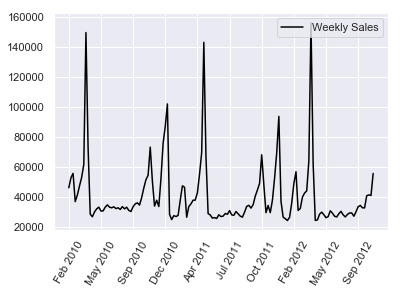

In [33]:
# Sales for store 20 with time series index
sales_timeseries = pd.DataFrame(processed_train[processed_train['Store'] == 20])
# print(sales_timeseries)
sales_timeseries_dateindex = sales_timeseries.set_index('Date') # Setting date as index
sales_timeseries_dateindex = sales_timeseries_dateindex.drop(columns = ['Store', 'Type', 'Size']) # Dropping columns
sales_timeseries_Dept1 = sales_timeseries_dateindex[sales_timeseries_dateindex['Dept'] == 1]
view = sales_timeseries_Dept1['Weekly_Sales']

# Presenting date labels in a more readable format
dates = view.index[::15]
print('DateTime dates:\n', dates)
labels = dates.strftime('%b %Y')
print('Modified dates:\n', labels)
plt.plot(view, color = 'black', label = 'Weekly Sales')
plt.legend(loc = 'upper right')
plt.xticks(dates, labels, rotation = 60)
plt.show()
# Looking at graph below, there seems to be a sharp spike in sales between Feb to May each year for store 20.

C:\Users\karti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


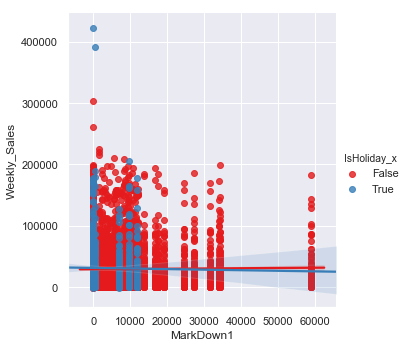

In [34]:
# Plots for store 20 sales
sns.lmplot(x = 'MarkDown1', y = 'Weekly_Sales', data = sales_timeseries, hue = 'IsHoliday_x', palette = 'Set1')
plt.show()

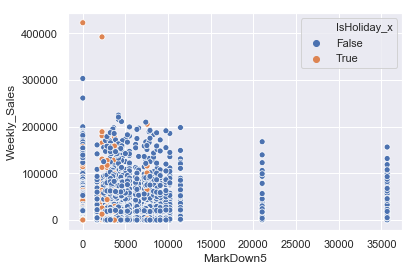

In [36]:
# Impact of MarkDown1 on Weekly Sales
sns.scatterplot(x = 'MarkDown5', y = 'Weekly_Sales', data = sales_timeseries, hue = 'IsHoliday_x')
# sales_timeseries.plot(kind = 'scatter', x = 'MarkDown1', y = 'Weekly_Sales')
plt.show()
# There seems to be no obvious correlation between MarkDown 5 and Weekly Sales numbers. 
# This confirms what we saw in the correlation matrix.